<a href="https://colab.research.google.com/github/namnitha/Dissertation/blob/master/30-07/BCI_dataanalysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mne

     |████████████████████████████████| 6.6MB 3.2MB/s 


In [2]:
pip install neo

     |████████████████████████████████| 2.1MB 3.3MB/s 
     |████████████████████████████████| 92kB 8.5MB/s 
  Created wheel for neo: filename=neo-0.8.0-cp36-none-any.whl size=558935 sha256=f9a1d61193ede97d2ad00fd5233037b7f51d5990350ac267b41f388dba962b35
  Stored in directory: /root/.cache/pip/wheels/28/35/f4/273432a8b9eb6c9182e666e9630cc92c221dabe81462606d9c
  Created wheel for quantities: filename=quantities-0.12.4-cp36-none-any.whl size=79167 sha256=87c457173b8c4b6813da09805fe1db9a6bcb2665f711f7cf21f1b83f6cb54e5d
  Stored in directory: /root/.cache/pip/wheels/2c/27/a5/62fb2a57d167d7b7164278de7399ba1504321c1d6c3a3802d5
Successfully built neo quantities


In [3]:
pip install BCI2kReader

In [4]:
import neo
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from BCI2kReader import BCI2kReader as b2k

In [6]:
data = b2k.BCI2kReader('/content/VPtaqS001R01.dat')


In [7]:
signals = data.signals
print(signals.shape)

(68, 96260)


In [8]:
#sampling rate
data.samplingrate

500.0

In [9]:
#reads the whole file and stores it in a numpy matrix channels
my_signals = data.signals

In [10]:
#reads all states as a dictionary
my_states= data.states
my_states['Running']

array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32)

In [11]:
print(my_states)

{'StimulusCodeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusTypeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SourceTime': array([[ 5509,  5509,  5509, ..., 11077, 11077, 11077]], dtype=int32), 'Running': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'Recording': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'StimulusCode': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusType': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'Flashing': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SelectedTarget': array([[5, 5, 5, ..., 6, 6, 6]], dtype=int32), 'SelectedRow': array([[1, 1, 1, ..., 2, 2, 2]], dtype=int32), 'SelectedColumn': array([[5, 5, 5, ..., 1, 1, 1]], dtype=int32), 'PhaseInSequence': array([[2, 2, 2, ..., 3, 3, 3]], dtype=int32), 'StimulusTime': array([[ 5478,  5478,  5478, ..., 11046, 11046, 11046]], dtype=int32)}


In [12]:
print(my_states['SourceTime'])
print(my_states['StimulusCode'])
print(my_states['StimulusType'])


[[ 5509  5509  5509 ... 11077 11077 11077]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


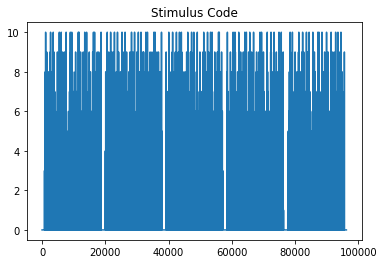

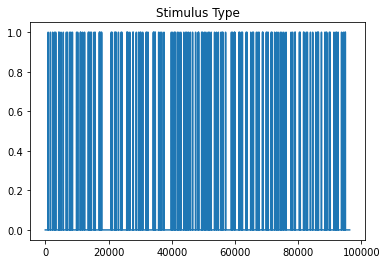

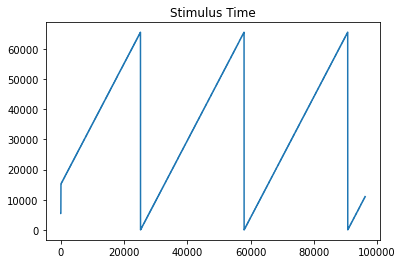

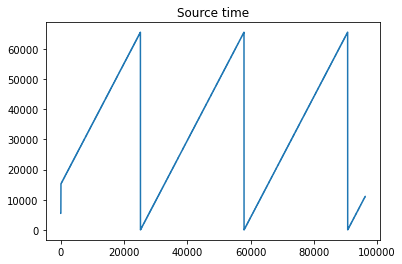

In [13]:
plt.title('Stimulus Code')
plt.plot(my_states['StimulusCode'][0])
plt.show()

plt.title('Stimulus Type')
plt.plot(my_states['StimulusType'][0])
plt.show()

plt.title('Stimulus Time')
plt.plot(my_states['StimulusTime'][0])
plt.show()

plt.title('Source time')
plt.plot(my_states['SourceTime'][0])
plt.show()

In [14]:
#creating MNE datastructures
#Creating Raw objects and info

info = mne.create_info(
    ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA', 'NA'],
    ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog', 'eog'],
    sfreq=100)
print(info)
raw = mne.io.RawArray(my_signals, info)
print(raw)

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, Fpz, FP2, F7, F3, Fz, F4, F8, FT9, FT7, FC5, FC3, FC1, FCz, ...
 chs: 63 EEG, 5 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 100.0 Hz
>
Creating RawArray with float64 data, n_channels=68, n_times=96260
    Range : 0 ... 96259 =      0.000 ...   962.590 secs
Ready.
<RawArray | 68 x 96260 (962.6 s), ~50.1 MB, data loaded>


<ipython-input-14-0860ec85aee9>:19: RuntimeWarning: Channel names are not unique, found duplicates for: {'NA'}. Applying running numbers for duplicates.
  sfreq=100)


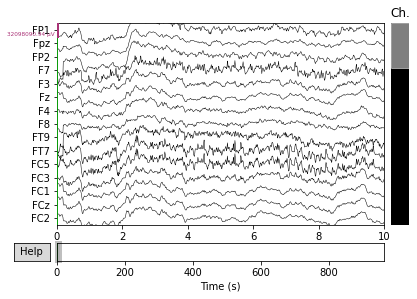

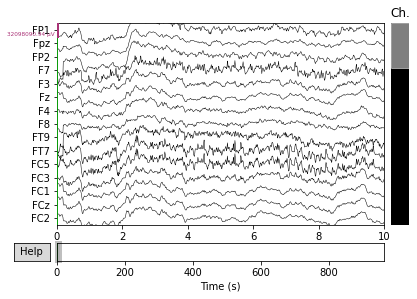

In [15]:
raw.plot(n_channels=15, title='Data from arrays', scalings='auto', 
                show=True, block=True)

In [16]:
data, times = raw[:, :10]
print(data.shape)

(68, 10)


In [17]:
start, stop = raw.time_as_index([0, 60])  # 100 s to 115 s data segment
data, times = raw[:306, start:stop]
print(data.shape)
print(times.shape)
#print times.min(), times.max()

(68, 6000)
(6000,)


Text(0, 0.5, ' data (T)')

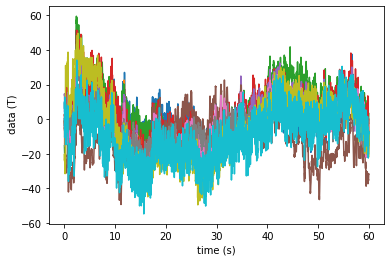

In [18]:
picks = mne.pick_types(raw.info, eeg=True, eog=True )
data, times = raw[picks[:10], start:stop]

import matplotlib.pyplot as plt
plt.plot(times, data.T)
plt.xlabel('time (s)')
plt.ylabel(' data (T)')


In [21]:
print(my_states['StimulusTime'])
print(my_states['SourceTime'])

[[ 5478  5478  5478 ... 11046 11046 11046]]
[[ 5509  5509  5509 ... 11077 11077 11077]]


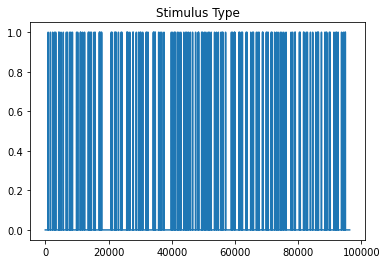

In [20]:
plt.title('Stimulus Type')
plt.plot(my_states['StimulusType'][0])
plt.show()

In [28]:
events = make_events(st, point, event_duration)
st = my_states['StimulusType']
def make_events(st, point, event_duration=0):
  # Get the event between two times.
  lower_time_limit = st[-1, 0]
  upper_time_limit = st[-1, -1]
  # Copy event into a Numpy ndarray.
  tmp = np.array([row[:] for row in point.st
                  if upper_time_limit >= row[-1] >= lower_time_limit],
                   dtype=np.int32)
  # Pre-allocate array for speed.
  events = np.zeros(shape=(tmp.shape[0], 3), dtype=np.int32)
 


NameError: ignored

In [29]:
st = my_states['StimulusType'][0]
LS = 0  #last state
for i in range(len(st)):
  print('current state = ', st[i])
  if(LS != st[i]):
    print('state change detected')
  LS = st[i]
  print('State = ', LS)
#events = np.column_stack((np.arange(len(epochs)), 0, np.ones(len(epochs), int))) and event_id=dict(unknown=1)    
event_id = 1
events = np.append(LS, 0 , event_id)

Streaming output truncated to the last 5000 lines.
current state =  1
current state =  1
current state =  1
current state =  1
current state =  1
current state =  1
current state =  1
current state =  1
current state =  1
current state =  0
state change detected
State =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
current state =  0
curr

ValueError: ignored

In [ ]:
print(events)

[[    0     0     1]
 [  100     0     1]
 [  200     0     1]
 ...
 [95900     0     1]
 [96000     0     1]
 [96100     0     1]]


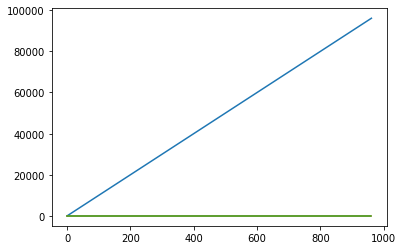

In [ ]:
plt.plot(events)

In [ ]:
 # If there is at least one event:
  if tmp.shape[0] > 0:      
    for event_index, (event_int, timestamp) in enumerate(tmp):
      # Get the index where this marker happened in the EEG data.
      eeg_index = (np.abs(st[-1, :] - timestamp)).argmin()
      # Add a row to the events array.
      events[event_index, :] = eeg_index, event_duration, event_int
      return events
#print(events)


In [ ]:
print(my_states['StimulusType'][0].shape)
print(st.shape                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    )

(96260,)
(1, 96260)


In [ ]:
event_id = 1
#events = my_states['SourceTime']
duration = 1
events = mne.make_fixed_length_events(raw, event_id, duration=duration)
print("EVENTS= \n", events)
# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

epochs = mne.Epochs(raw, events=events, event_id= 1, tmin=tmin, tmax=tmax, baseline=None, verbose=True)

epochs.plot(scalings='auto', show=True, block=True)

In [ ]:
print(st[i].shape)
print(my_states['StimulusType'].shape)
print(my_states['StimulusCode'].shape)

()
(1, 96260)
(1, 96260)


In [ ]:
st = my_states['StimulusType']
#print(np.where((st == 0) & (st =! 0)))
notequalzero = print(np.where(st != 0))
equalzero = print(np.where(st == 0))

(array([0, 0, 0, ..., 0, 0, 0]), array([  860,   861,   862, ..., 94897, 94898, 94899]))
(array([0, 0, 0, ..., 0, 0, 0]), array([    0,     1,     2, ..., 96257, 96258, 96259]))


In [ ]:
event_id = 1
events = np.array([[my_states['StimulusCode'], 0, event_id]])
#duration = 1
#events = mne.make_fixed_length_events(raw, event_id, duration=duration)
print("EVENTS= \n", events)
# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

epochs = mne.Epochs(raw, events=events, event_id= 1, tmin=tmin, tmax=tmax, baseline=None, verbose=True)

epochs.plot(scalings='auto', show=True, block=True)

EVENTS= 
 [[array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32) 0 1]]


TypeError: ignored

In [ ]:
picks = mne.pick_types(raw.info, eeg=True, eog=True )

start, stop = raw.time_as_index([0,15])
data, times = raw[picks[:5], start:(stop+1)]

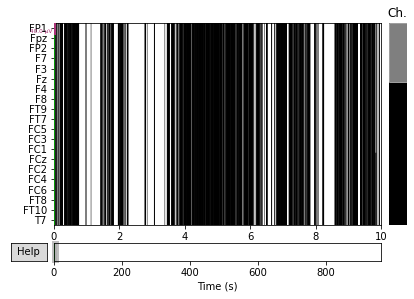

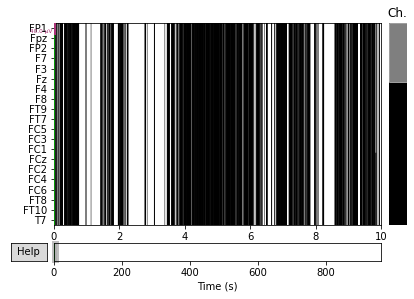

In [ ]:
raw.plot()

In [ ]:
#Creating info
ch_names=['FP1', 'Fpz'],
ch_types=['eeg', 'eeg'],
#Names for each channel
#ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
#          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
#          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
#          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
#          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
#          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
#          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA'],

#Type of each channel
#ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
#          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
#          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
#          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
#          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
#          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
#          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog'],

#The sampling rate of the recoding
sfreq= 1000

# The EEG channels use the standard naming strategy.
# By supplying the 'montage' parameter, approximate locations  will be added for them
#montage = 'standard_1005'

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
#info.set_montage(montage)

print(info)

ValueError: ignored